In [69]:
import pandas as pd
import numpy as np

        

In [70]:
flow = pd.read_csv('fdata_3oct_simul.csv')

In [71]:
new_flow = pd.DataFrame(flow)
new_flow

,TimeStamp,Unnamed: 1,Unnamed: 2,Unnamed: 3,TimeStamp1,Unnamed: 5,Specification,Value,Unit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14:19:25.679 -> Flow rate: 0.00 L/m,NaN,NaN,NaN,19:25.7,NaN,Flow rate:,0.00,L/m
3,14:19:25.775 -> Flow rate: 0.00 L/m,NaN,NaN,NaN,19:25.8,NaN,Flow rate:,0.00,L/m
4,14:19:25.869 -> Flow rate: 0.00 L/m,NaN,NaN,NaN,19:25.9,NaN,Flow rate:,0.00,L/m
...,...,...,...,...,...,...,...,...,...
1261,14:21:31.563 -> Flow rate: 0.00 L/m,NaN,NaN,NaN,21:31.6,NaN,Flow rate:,0.00,L/m
1262,14:21:31.657 -> Flow rate: 0.00 L/m,NaN,NaN,NaN,21:31.7,NaN,Flow rate:,0.00,L/m
1263,14:21:31.800 -> Flow rate: 0.00 L/m,NaN,NaN,NaN,21:31.8,NaN,Flow rate:,0.00,L/m
1264,14:21:31.895 -> Flow rate: 8.33 L/m,NaN,NaN,NaN,21:31.9,NaN,Flow rate:,8.33,L/m


In [72]:
new_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TimeStamp      1264 non-null   object 
 1   Unnamed: 1     0 non-null      float64
 2   Unnamed: 2     0 non-null      float64
 3   Unnamed: 3     0 non-null      float64
 4   TimeStamp1     1264 non-null   object 
 5   Unnamed: 5     0 non-null      float64
 6   Specification  1264 non-null   object 
 7   Value          1264 non-null   float64
 8   Unit           1264 non-null   object 
dtypes: float64(5), object(4)
memory usage: 89.1+ KB


In [73]:
new_flow = new_flow[['TimeStamp1', 'Value']]


In [74]:
new_flow = new_flow[['TimeStamp1', 'Value']].dropna(subset=['TimeStamp1', 'Value'])


In [75]:
# Convert 'TimeStamp1' to a datetime format
new_flow['TimeStamp1'] = pd.to_datetime(new_flow['TimeStamp1'], format='%M:%S.%f')

# Extract the time component from 'TimeStamp1'
new_flow['Time'] = new_flow['TimeStamp1'].dt.time


In [76]:
# Convert the time component to a string
new_flow['Time'] = new_flow['TimeStamp1'].dt.strftime('%M:%S.%f')

# Now you can use the 'Time' column for plotting


In [77]:
new_flow


,TimeStamp1,Value,Time
2,1900-01-01 00:19:25.700,0.00,19:25.700000
3,1900-01-01 00:19:25.800,0.00,19:25.800000
4,1900-01-01 00:19:25.900,0.00,19:25.900000
5,1900-01-01 00:19:26.000,0.00,19:26.000000
6,1900-01-01 00:19:26.100,0.00,19:26.100000
...,...,...,...
1261,1900-01-01 00:21:31.600,0.00,21:31.600000
1262,1900-01-01 00:21:31.700,0.00,21:31.700000
1263,1900-01-01 00:21:31.800,0.00,21:31.800000
1264,1900-01-01 00:21:31.900,8.33,21:31.900000


In [78]:
new_flow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 2 to 1265
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TimeStamp1  1264 non-null   datetime64[ns]
 1   Value       1264 non-null   float64       
 2   Time        1264 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.5+ KB


In [79]:
import matplotlib
import matplotlib.pyplot as plt

In [80]:
x_points = new_flow['Time']
y_points = new_flow['Value']

In [81]:
np.dtype(x_points)

dtype('O')

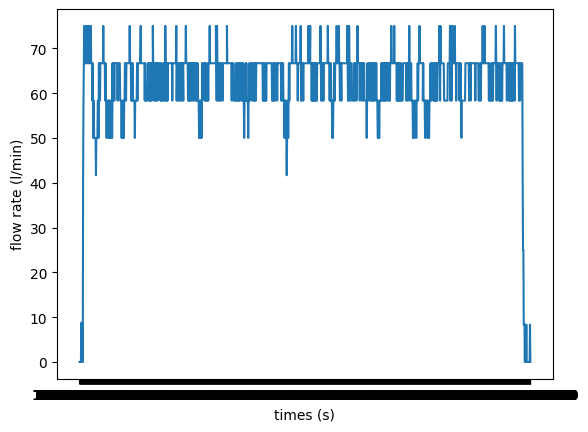

In [82]:
plt.plot(x_points,y_points)
plt.xlabel('times (s)')
plt.ylabel('flow rate (l/min)')
# plt.grid()
plt.show()

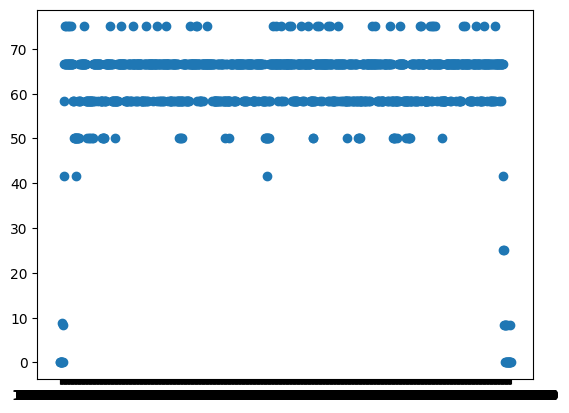

In [83]:
plt.scatter(x_points,y_points)
plt.show()

In [84]:
# Ensure 'TimeStamp1' is in datetime format
new_flow['TimeStamp1'] = pd.to_datetime(new_flow['TimeStamp1'], format='%H:%M:%S.%f')

# Extract seconds from 'TimeStamp1'
new_flow['Seconds'] = new_flow['TimeStamp1'].dt.second



In [85]:
new_flow

,TimeStamp1,Value,Time,Seconds
2,1900-01-01 00:19:25.700,0.00,19:25.700000,25
3,1900-01-01 00:19:25.800,0.00,19:25.800000,25
4,1900-01-01 00:19:25.900,0.00,19:25.900000,25
5,1900-01-01 00:19:26.000,0.00,19:26.000000,26
6,1900-01-01 00:19:26.100,0.00,19:26.100000,26
...,...,...,...,...
1261,1900-01-01 00:21:31.600,0.00,21:31.600000,31
1262,1900-01-01 00:21:31.700,0.00,21:31.700000,31
1263,1900-01-01 00:21:31.800,0.00,21:31.800000,31
1264,1900-01-01 00:21:31.900,8.33,21:31.900000,31


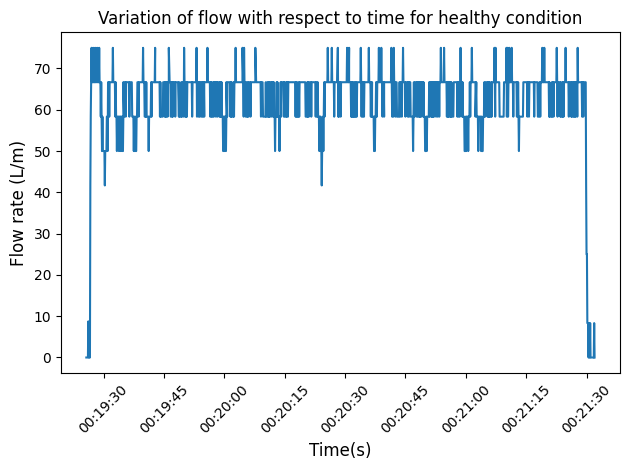

In [141]:

# import matplotlib.pyplot as plt

# Plot using the complete timestamp
plt.plot(new_flow['TimeStamp1'], new_flow['Value'])

# Alternatively, if you extracted seconds, you can use:
# plt.plot(new_flow['Seconds'], new_flow['Value'], marker='o', linestyle='-', markersize=3)

# Labeling the plot
plt.xlabel('Time(s)',fontsize=12)
plt.ylabel('Flow rate (L/m)',fontsize=12)
plt.title('Variation of flow with respect to time for healthy condition')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1ef28e26b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef270f1350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef28ea1610>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef28c00c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef28c4f610>],
 'means': []}

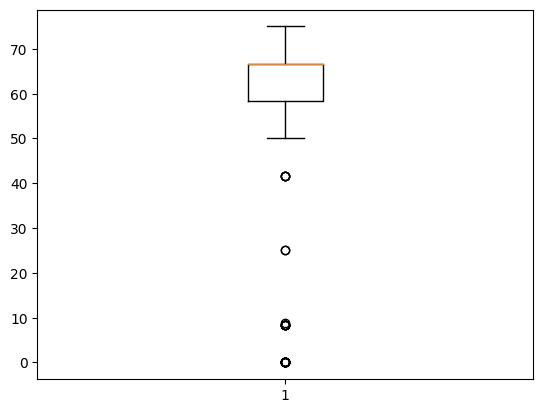

In [87]:
plt.boxplot(new_flow['Value'])

In [88]:
healthy = new_flow['Value']

In [89]:
healthy = healthy[14:1214]

30 degree bloackage


In [90]:
flow_blockage_fault30_data = pd.read_csv('fdata_12oct_30.csv')

In [91]:
flow_blockage_fault30 = pd.DataFrame(flow_blockage_fault30_data)

In [92]:
flow_blockage_fault30.head()

,TimeStamp,Unnamed: 1,Unnamed: 2,Unnamed: 3,TimeStamp1,Unnamed: 5,Specification,Value,Unit
0,16:10:59.619 -> Flow rate: 66.67 L/m,NaN,NaN,NaN,10:59.6,NaN,Flow rate:,66.67,L/m
1,16:10:59.689 -> Flow rate: 66.67 L/m,NaN,NaN,NaN,10:59.7,NaN,Flow rate:,66.67,L/m
2,16:10:59.784 -> Flow rate: 66.67 L/m,NaN,NaN,NaN,10:59.8,NaN,Flow rate:,66.67,L/m
3,16:10:59.877 -> Flow rate: 66.67 L/m,NaN,NaN,NaN,10:59.9,NaN,Flow rate:,66.67,L/m
4,16:10:59.973 -> Flow rate: 66.67 L/m,NaN,NaN,NaN,11:00.0,NaN,Flow rate:,66.67,L/m


In [93]:
bf30 = flow_blockage_fault30[['TimeStamp1','Value']]

In [94]:
bf30

,TimeStamp1,Value
0,10:59.6,66.67
1,10:59.7,66.67
2,10:59.8,66.67
3,10:59.9,66.67
4,11:00.0,66.67
...,...,...
1293,13:08.9,8.33
1294,13:09.0,0.00
1295,13:09.1,8.33
1296,13:09.2,0.00


In [95]:
# Convert 'TimeStamp1' to a datetime format
bf30['TimeStamp1'] = pd.to_datetime(bf30['TimeStamp1'], format='%M:%S.%f')

C:\Users\VGAUR\AppData\Local\Temp\ipykernel_14428\2226806151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf30['TimeStamp1'] = pd.to_datetime(bf30['TimeStamp1'], format='%M:%S.%f')


In [96]:
 
bf301 = bf30[['TimeStamp1', 'Value']].dropna(subset=['TimeStamp1', 'Value'])

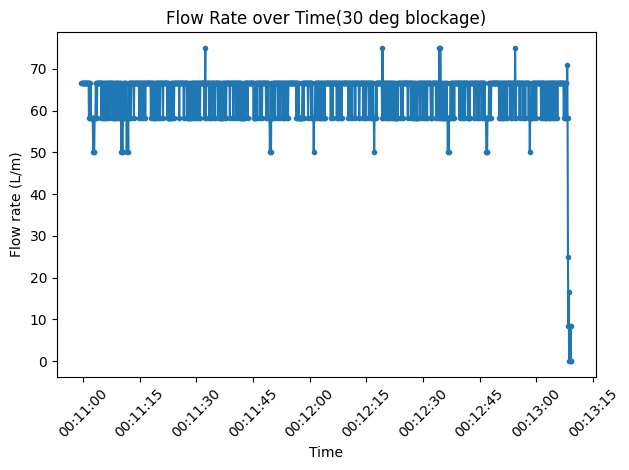

In [97]:

# Plot using the complete timestamp
plt.plot(bf301['TimeStamp1'], bf301['Value'], marker='o', linestyle='-', markersize=3)

# Alternatively, if you extracted seconds, you can use:
# plt.plot(new_flow['Seconds'], new_flow['Value'], marker='o', linestyle='-', markersize=3)

# Labeling the plot
plt.xlabel('Time')
plt.ylabel('Flow rate (L/m)')
plt.title('Flow Rate over Time(30 deg blockage)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.show()


In [98]:
blockage_30 = bf301['Value']

In [99]:
blockage_30 = blockage_30[1:1200]

45 degree bloackage

In [100]:
flow_blockage_fault45_data = pd.read_csv('fdata_12oct_45.csv')

In [101]:
flow_blockage_fault45 = pd.DataFrame(flow_blockage_fault45_data)

In [102]:
bf45 = flow_blockage_fault45[['TimeStamp1','Value']]

In [103]:
# Convert 'TimeStamp1' to a datetime format
bf45['TimeStamp1'] = pd.to_datetime(bf45['TimeStamp1'], format='%M:%S.%f')

C:\Users\VGAUR\AppData\Local\Temp\ipykernel_14428\1688375485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf45['TimeStamp1'] = pd.to_datetime(bf45['TimeStamp1'], format='%M:%S.%f')


In [104]:
 
bf451 = bf45[['TimeStamp1', 'Value']].dropna(subset=['TimeStamp1', 'Value'])

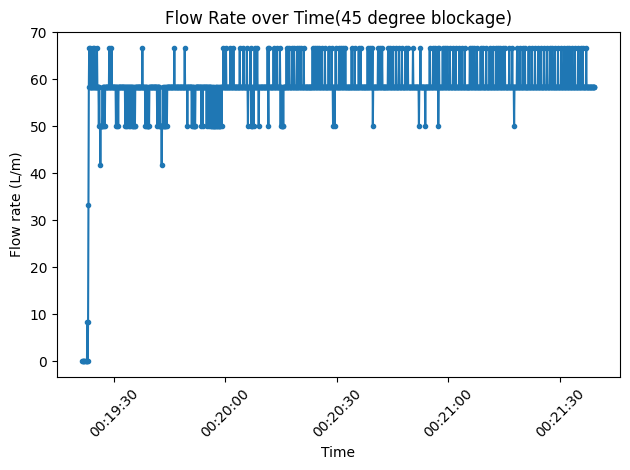

In [105]:
# Plot using the complete timestamp
plt.plot(bf451['TimeStamp1'], bf451['Value'], marker='o', linestyle='-', markersize=3)

# Alternatively, if you extracted seconds, you can use:
# plt.plot(new_flow['Seconds'], new_flow['Value'], marker='o', linestyle='-', markersize=3)

# Labeling the plot
plt.xlabel('Time')
plt.ylabel('Flow rate (L/m)')
plt.title('Flow Rate over Time(45 degree blockage)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.show()

In [106]:
blockage_45 =  bf451['Value']

In [107]:
blockage_45 = blockage_45[1:1200]

60 degree fault

In [108]:
flow_blockage_fault60_data = pd.read_csv('fdata_12oct_60.csv')

In [109]:
flow_blockage_fault60 = pd.DataFrame(flow_blockage_fault60_data)

In [110]:
flow_blockage_fault60.head()

,TimeStamp,Unnamed: 1,Unnamed: 2,Unnamed: 3,TimeStamp1,Unnamed: 5,Specification,Value,Unit
0,16:30:21.721 -> Flow rate: 50.00 L/m,NaN,NaN,NaN,30:21.7,NaN,Flow rate:,50.00,L/m
1,16:30:21.800 -> Flow rate: 50.00 L/m,NaN,NaN,NaN,30:21.8,NaN,Flow rate:,50.00,L/m
2,16:30:21.893 -> Flow rate: 50.00 L/m,NaN,NaN,NaN,30:21.9,NaN,Flow rate:,50.00,L/m
3,16:30:21.987 -> Flow rate: 41.67 L/m,NaN,NaN,NaN,30:22.0,NaN,Flow rate:,41.67,L/m
4,16:30:22.128 -> Flow rate: 50.00 L/m,NaN,NaN,NaN,30:22.1,NaN,Flow rate:,50.00,L/m


In [111]:
bf60 = flow_blockage_fault60[['TimeStamp1','Value']]

In [112]:
bf601 = bf60[['TimeStamp1', 'Value']].dropna(subset=['TimeStamp1', 'Value'])

In [113]:
# Convert 'TimeStamp1' to a datetime format
bf60['TimeStamp1'] = pd.to_datetime(bf60['TimeStamp1'], format='%M:%S.%f')

C:\Users\VGAUR\AppData\Local\Temp\ipykernel_14428\3141398357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf60['TimeStamp1'] = pd.to_datetime(bf60['TimeStamp1'], format='%M:%S.%f')


In [114]:
bf601 = bf60[['TimeStamp1', 'Value']].dropna(subset=['TimeStamp1', 'Value'])

In [115]:
bf601

,TimeStamp1,Value
0,1900-01-01 00:30:21.700,50.00
1,1900-01-01 00:30:21.800,50.00
2,1900-01-01 00:30:21.900,50.00
3,1900-01-01 00:30:22.000,41.67
4,1900-01-01 00:30:22.100,50.00
...,...,...
1275,1900-01-01 00:32:29.200,0.00
1276,1900-01-01 00:32:29.300,0.00
1277,1900-01-01 00:32:29.400,0.00
1278,1900-01-01 00:32:29.500,0.00


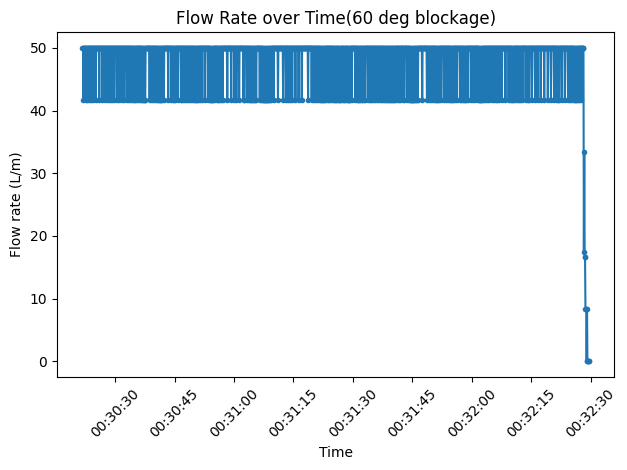

In [116]:
# Plot using the complete timestamp
plt.plot(bf601['TimeStamp1'], bf601['Value'], marker='o', linestyle='-', markersize=3)

# Alternatively, if you extracted seconds, you can use:
# plt.plot(new_flow['Seconds'], new_flow['Value'], marker='o', linestyle='-', markersize=3)

# Labeling the plot
plt.xlabel('Time')
plt.ylabel('Flow rate (L/m)')
plt.title('Flow Rate over Time(60 deg blockage)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.show()

In [117]:
blockage_60 = bf601['Value']

In [118]:
blockage_60 = blockage_60[1:1200]

In [119]:
import pandas as pd
import numpy as np

# Assuming healthy, blockage_30, blockage_45, and blockage_60 are Series
# Create the time column with 1200 points between 1 and 2 seconds
time = np.linspace(1, 120, 1200)

# Ensure the other columns also have 1200 data points before concatenating.
# If they don't, you might need to adjust them accordingly.
# Assuming healthy, blockage_30, blockage_45, and blockage_60 have 1200 rows

# Combine the columns into a DataFrame
combine = pd.concat([pd.Series(time, name='time'), 
                     healthy.reset_index(drop=True), 
                     blockage_30.reset_index(drop=True), 
                     blockage_45.reset_index(drop=True), 
                     blockage_60.reset_index(drop=True)], axis=1)

# Rename the other columns for clarity if needed
combine.columns = ['time', 'Healthy', 'Blockage_30', 'Blockage_45', 'Blockage_60']

print(combine)


            time  Healthy  Blockage_30  Blockage_45  Blockage_60
0       1.000000    66.67        66.67         0.00        50.00
1       1.099249    66.67        66.67         0.00        50.00
2       1.198499    66.67        66.67         0.00        41.67
3       1.297748    75.00        66.67         0.00        50.00
4       1.396997    66.67        66.67         0.00        50.00
...          ...      ...          ...          ...          ...
1195  119.603003    66.67        66.67        66.67        50.00
1196  119.702252    66.67        66.67        58.33        41.67
1197  119.801501    58.33        58.33        58.33        50.00
1198  119.900751    66.67        66.67        58.33        50.00
1199  120.000000    58.33          NaN          NaN          NaN

[1200 rows x 5 columns]


In [120]:
combine.dropna(inplace=True)

In [121]:
combine

,time,Healthy,Blockage_30,Blockage_45,Blockage_60
0,1.000000,66.67,66.67,0.00,50.00
1,1.099249,66.67,66.67,0.00,50.00
2,1.198499,66.67,66.67,0.00,41.67
3,1.297748,75.00,66.67,0.00,50.00
4,1.396997,66.67,66.67,0.00,50.00
...,...,...,...,...,...
1194,119.503753,58.33,66.67,58.33,50.00
1195,119.603003,66.67,66.67,66.67,50.00
1196,119.702252,66.67,66.67,58.33,41.67
1197,119.801501,58.33,58.33,58.33,50.00


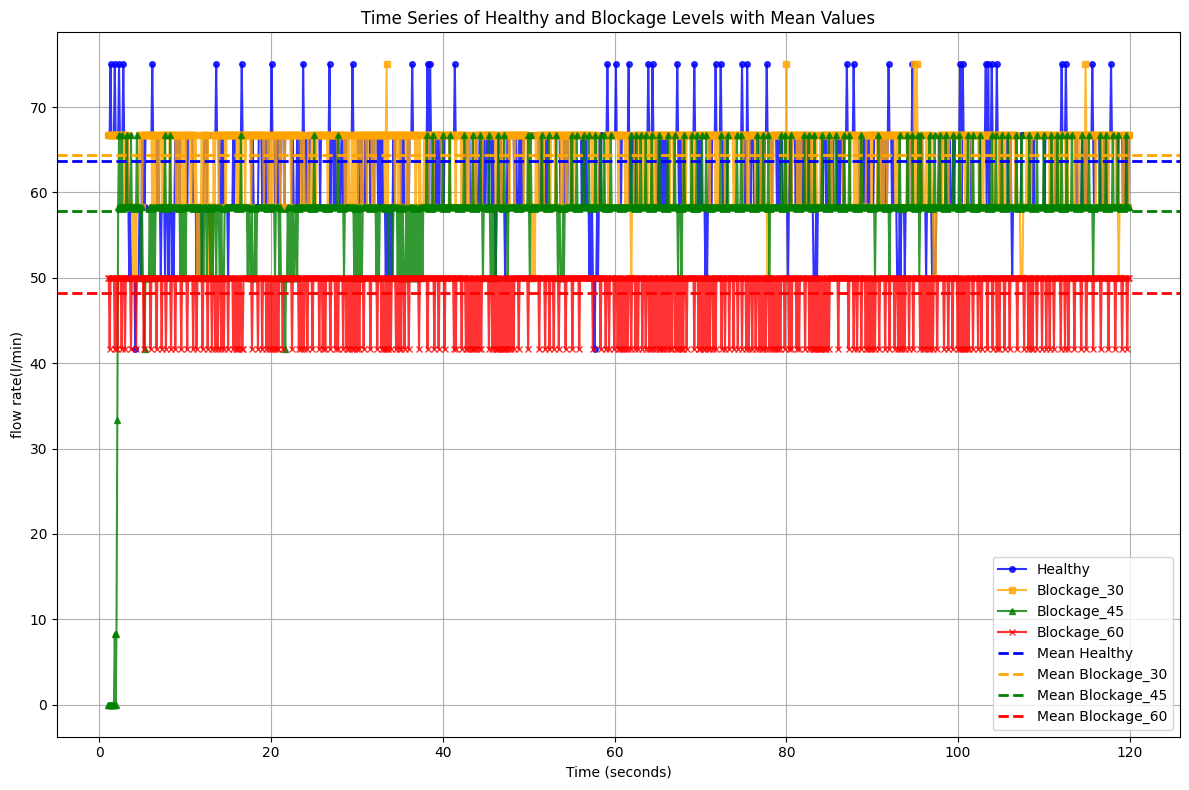

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combine' is your DataFrame containing the columns 'time', 'Healthy', 'Blockage_30', 'Blockage_45', 'Blockage_60'

# Plotting the data
plt.figure(figsize=(12, 8))

# Adjust line styles, colors, and add transparency
plt.plot(combine['time'], combine['Healthy'], label='Healthy', color='blue', marker='o', markersize=4, alpha=0.8)
plt.plot(combine['time'], combine['Blockage_30'], label='Blockage_30', color='orange', marker='s', markersize=4, alpha=0.8)
plt.plot(combine['time'], combine['Blockage_45'], label='Blockage_45', color='green', marker='^', markersize=4, alpha=0.8)
plt.plot(combine['time'], combine['Blockage_60'], label='Blockage_60', color='red', marker='x', markersize=4, alpha=0.8)

# Calculate and plot mean lines
mean_healthy = combine['Healthy'].mean()
mean_blockage_30 = combine['Blockage_30'].mean()
mean_blockage_45 = combine['Blockage_45'].mean()
mean_blockage_60 = combine['Blockage_60'].mean()

# Adding mean lines
plt.axhline(y=mean_healthy, color='blue', linestyle='--', linewidth=2, label='Mean Healthy')
plt.axhline(y=mean_blockage_30, color='orange', linestyle='--', linewidth=2, label='Mean Blockage_30')
plt.axhline(y=mean_blockage_45, color='green', linestyle='--', linewidth=2, label='Mean Blockage_45')
plt.axhline(y=mean_blockage_60, color='red', linestyle='--', linewidth=2, label='Mean Blockage_60')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('flow rate(l/min)')
plt.title('Time Series of Healthy and Blockage Levels with Mean Values')
plt.legend(loc='best')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

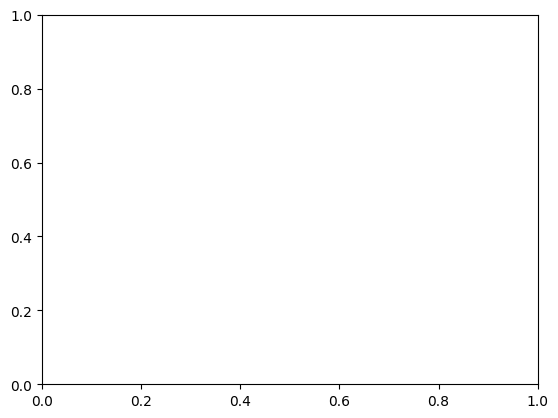

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fdata_3oct_simul.csv');

x = df['TimeStamp1'];
y = df['Value'];

plt.plot(x,y)

plt.show()